# Senior Project Code
    Author: Luke Ingraham
    Version: 1
    Last Updated: 10/13/2023

# Importing Libraries

# Case 1   
       Intial calculations are being done using the information I gathered about the oringinal cyclotron made by Lawrence at Berkley. 
    Information provided:
        Proton
        R = 11 cm
        T = 80 Kev
        
# Case 2
        Test paper calculations
            Proton
            R = 0.08 m
            B = 2.7 T
            V = 50 v
            d = 1.25 in
            
# Case 3
        New calculations based off meeting with Antonios and paper calculations
            Proton
            R = 0.08 m
            B = 0.3 T
            V = 50 v
            d = 1.25 in
            

# Good data for case 1
    
    ________ 24507.428571428572 V __________
    Cyclotron Frequency is 35593366.12599246 Hz
    The final speed of the particle is 3914944.8898146213 m/s
    Kinetic Energy is 1.2797872564388491e-14 J ( 79986.70352742806 eV)
    ---w matches
    35593366.12599246  Hz vs. 35593366.12599246 Hz
    Pd:  0.0 %
    ---V doesn't match
    3914944.8898146213 m/s vs. 3915270.273859171 m/s
    Pd:  0.008311331416093089 %
    ---KE doesn't match
    79986.70352742806 J vs. 80000 J
    Pd:  0.016623353614487028 %
    
    24509.51020408163 V __________
    Cyclotron Frequency is 35593366.12599246 Hz
    The final speed of the particle is 3915277.358705303 m/s
    Kinetic Energy is 1.2800046324317964e-14 J ( 80000.28952698727 eV)
    ---w matches
    35593366.12599246  Hz vs. 35593366.12599246 Hz
    Pd:  0.0 %
    ---V doesn't match
    3915277.358705303 m/s vs. 3915270.273859171 m/s
    Pd:  0.00018095387587846516 %
    ---KE matches
    80000.28952698727 J vs. 80000 J
    Pd:  0.00036190742431028576 %

# Case 3

## Parameters
    ('ß = 0.3T', 'V = 50volts', 'd = 0.0003m', 'r = 0.08m')

## Function gathered data
    V_max =  2299401.1976047903  m/s ( 2299 km/s )
    V_max2 =  2299401.197604791 m/s ( 2299 km/s )
    Kinetic =  27592.81437125749 eV ( 28 KeV )
    Max Kinetic Energy =  27592.814371257486 eV ( 28 KeV )
    B =  0.29999999999999993  T (or kg/s•C)
    w =  28742514.97005987  rad/s
    f =  4574513.334377829  Hz ( 5 MHz)
    time =  1.0930124440614492e-07
## Model data
    
    --->w doesn't match
    28742514.970059875  rad/s vs. 28742514.97005987 rad/s
    Pd:  1.2960905830065413e-14 %
    --->V doesn't match
    2318112.8932986413 m/s vs. 2299401.1976047903 m/s
    Pd:  0.807195186565073 %
    --->KE doesn't match
    28043.722296091422 eV vs. 27592.81437125749 eV
    Pd:  1.6078747324379905 %
    --->t doesn't match
    4.859999999999841e-06 s vs. 1.0930124440614492e-07 s
    Pd:  97.75100320151957 %
    
    Cyclotron Frequency is 28742514.970059875 rad/s (or  4574513.33437783  Hz, 5 MHz)
    The final speed of the particle is 2318112.8932986413 m/s,  2318 km/s
    Kinetic Energy is 4.486995567374628e-15 J ( 28043.722296091422 eV, 28 KeV
    
 


# Case 4
## Parameters
        ('ß = 0.264T', 'V = 50volts', 'd = 0.0003m', 'r = 0.08m')


# Case 5
## Parameters
    ('ß = 0.701T', 'V = 50volts', 'd = 0.000254m', 'r = 0.08m')
    
    Sim:
        -Cyclotron Frequency is 67161676.64670658 rad/s (or  10689112.824662862  Hz, 11 MHz)
        -The final speed of the particle is 3289973.6075865715 m/s,  3290 km/s
        -Kinetic Energy is 9.037978492744527e-15 J ( 56487.36557965329 eV, 56 KeV)
        -Distance Traveled is 20.22708816634935 m
        
    Calc:
        -V_max =  3274131.7365269456  m/s ( 3274 km/s )
        -V_max2 =  3274131.7365269456 m/s ( 3274 km/s )
        -Kinetic =  55944.679715568855 eV ( 56 KeV )
        -Max Kinetic Energy =  55944.679715568855 eV ( 56 KeV )
        -B =  0.7009999999999998  T (or kg/s•C)
        -w =  67161676.64670658  rad/s
        -f =  10689112.824662862  Hz ( 11 MHz)
        -time =  4.677656679292934e-08
        -d_expected =  171.36249097995398 m ( 171 m)
    

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
from matplotlib import pyplot
import csv
from scipy.optimize import curve_fit
import scipy.optimize as opt;


# Defining useful Functions

In [11]:
def kinetic(V_max, m):
    T = (m*(V_max**2))/2
    return T

def max_kinetic(q, B, r, m):
    KE_m = ((q**2)*(B**2)*(r**2))/(2*m)
    return KE_m
    
def V_max(T, m):
    V_max = np.sqrt((2*T)/m)
    return V_max

def V_max2(q, B, R, m):
    V_max2 = (q*B*R)/m
    return V_max2

def B_field(V_max , m, q, R):
    B = ((V_max*m)/(R*q))
    return B

def eV_to_J(T):
    ke = T*(1.6*(10**-19))
    return ke

def J_to_eV(T):
    ke = T/(1.6*(10**-19))
    return ke

def cyclo_freq(q, B, m):
    w = (q*B)/m
    return w

def freq(q, B, m):
    f = (q*B)/(2*np.pi*m)
    return f

def expected_radius(v, b, q, m):
    expected_radius = v / ( b * (q/m ) )
    return expected_radius 

def expected_period(b, q, m):
    expected_period = 2.0*np.pi/( b * (q/m ) )
    return expected_period

def expected_time(m, q, b):
    expected_time = ((m*np.pi)/(q*b))
    return expected_time

def percent_diff(x1, x2):
    pd = np.abs((x2 - x1)/x1)*100
    return pd

def in_to_m(inch):
    unit = inch/39.37
    return unit

def m_to_in(m):
    unit = m*39.37
    return unit

def check_structure():
    if w == Cyclotron_frequency:
        print("--->w matches")
        print(w, " rad/s vs.", Cyclotron_frequency, "rad/s")
        print("Pd: ", percent_diff(w, Cyclotron_frequency), "%")
    else:
        print("--->w doesn't match")
        print(w, " rad/s vs.", Cyclotron_frequency, "rad/s")
        print("Pd: ", percent_diff(w, Cyclotron_frequency), "%")
        
    if  np.linalg.norm(particlev) == V_maximum:
        print("--->V matches")
        print(np.linalg.norm(particlev), "m/s vs.", V_maximum, "m/s")
        print("Pd: ", percent_diff(np.linalg.norm(particlev), V_maximum), "%")
    else:
        print("--->V doesn't match")
        print(np.linalg.norm(particlev), "m/s vs.", V_maximum, "m/s")
        print("Pd: ", percent_diff(np.linalg.norm(particlev), V_maximum), "%")
        
    if round(J_to_eV(KE)) == T_kinetic:
        print("--->KE matches")
        print(J_to_eV(KE), "eV vs.", T_kinetic, "eV")
        print("Pd: ",percent_diff(J_to_eV(KE), T_kinetic), "%")
    else:
        print("--->KE doesn't match")
        print(J_to_eV(KE), "eV vs.", T_kinetic, "eV")
        print("Pd: ", percent_diff(J_to_eV(KE), T_kinetic), "%")
        
    if t == time:
        print("--->t matches")
        print(t, "s vs.", time, "s")
        print("Pd: ",percent_diff(t, time), "%")
    else:
        print("--->t doesn't match")
        print(t, "s vs.", time, "s")
        print("Pd: ", percent_diff(t, time), "%")
        
def model_f(x,a,b,c):
      return a*(x-b)**2+c
    
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

def fitter(V, Alpha, Beta, Gamma, Delta, C1, C2, C3):
    fit=Alpha-np.exp(-Gamma*V)*Beta*(np.cos((2*np.sqrt(2)*np.pi*(C1*V+(C2*V)**2+(C3*V)**3))/Lambda + Delta))
    return fit
    #Luke Ingraham
    
def vel_plot(X, Y, title, color):
    peaks, _ = find_peaks(X, height=0)

    # calculate polynomial
    z = np.polyfit(X[peaks],Y[peaks], 3)
    f = np.poly1d(z)

    # calculate new x's and y's
    x_new = np.linspace((Y[peaks])[0], (Y[peaks])[-1], 50)
    y_new = f(x_new)

    plt.figure(figsize=(14,8))
    plt.title("Fit of the peaks of the" + str(title) + "with a 3 order polynomial", size=15)
    plt.xlabel("Time [s]", size=12)
    plt.ylabel("Velocity [m/s]", size=12)
    plt.plot(X, Y, color , label = 'Curve')
    plt.plot(X[peaks_y],Y[peaks],'ko', markersize = 8,  label = 'peaks')
    plt.plot( x_new, y_new, 'r',label ='Fit_order 3')
    plt.legend(fontsize=10)
    plt.show()
    print("Acceleration" + str(title) + "= ")
    print(f)

def distance_traveled(KE, V, R):
    d = (KE *np.pi*R)/V
    return d

def Tesla_to_Gauss(B):
    return B*1e4

def Gauss_to_Tesla(B):
    return B/1e4

def J_to_eV(unit):
    return unit*(6.242e+18)

def eV_to_J(unit):
    return unit/(6.242e+18)

def cm_to_inch(unit):
    return unit/2.54



In [13]:
m_proton = (1.67*(10**-27))
print(V_max(eV_to_J(80000), m_proton)/1000, "Km/s")

3917.778454945286 Km/s


# Function gathered data

In [77]:
m_proton = (1.67*(10**-27))
q_proton = (1.6 *(10**-19))
b = 1
R = 0.04
voltage_def = 100


Max_kinetic = max_kinetic(q_proton, b, R, m_proton)

V_maximum = V_max(Max_kinetic, m_proton)
print("V_max = ", V_maximum, " m/s (", (round(V_maximum/1000)), "km/s )")

V_Maximum2 = V_max2(q_proton, b, R, m_proton)
print("V_max2 = ", V_Maximum2, "m/s (", (round(V_Maximum2/1000)), "km/s )")

Kinetic = kinetic(V_Maximum2, m_proton)
print("Kinetic = ", J_to_eV(Kinetic), "eV (", (round(J_to_eV(Kinetic)/1000)),"KeV )" )

print("Max Kinetic Energy = ", J_to_eV(Max_kinetic), "eV (", (round(J_to_eV(Max_kinetic)/1000)),"KeV )" )

Mag_field = B_field(V_maximum, m_proton, q_proton, R)
print("B = ", Mag_field, " T (or kg/s•C)")

Cyclotron_frequency = cyclo_freq(q_proton, Mag_field, m_proton)
print("w = ", Cyclotron_frequency, " rad/s")

frequency = freq(q_proton, Mag_field, m_proton)
print("f = ", frequency, " Hz (", (round(frequency/1e6)), "MHz)")

time = expected_time(m_proton, q_proton, Mag_field)
print("time = ", time)

distance = distance_traveled(round(J_to_eV(Kinetic)), voltage_def, R)
print("d_expected = ", distance, "m (", round(distance), "m)")

T_kinetic = J_to_eV(Kinetic)

V_max =  3832335.3293413175  m/s ( 3832 km/s )
V_max2 =  3832335.3293413175 m/s ( 3832 km/s )
Kinetic =  76548.59880239522 eV ( 77 KeV )
Max Kinetic Energy =  76548.59880239522 eV ( 77 KeV )
B =  1.0  T (or kg/s•C)
w =  95808383.23353294  rad/s
f =  15248377.781259434  Hz ( 15 MHz)
time =  3.2790373321843464e-08
d_expected =  96.19431041585804 m ( 96 m)


# Sim Data

In [96]:
particlepos = np.array([0.0,0.0,0.0])
particlev = np.array([0.0,0.0,0.0]) #Set the initial particle speed to 0

particleposx = [particlepos[0]] #create an array for the x position of the particle
particleposy = [particlepos[1]] #create an array for the y position of the particle

q = 1.6e-19 #Set the charge of the particle to the charge of a proton
m = 1.67e-27 #Set mass of the particle to the mass of a proton

V = 100 #Set voltage between the plates to 50V
#d = 0.000254
d = in_to_m(0.09) #Set the separation between the plates to 90 micrometers
E_0 = V/(d) #define the electric field based on voltage between the D's and separation

B = np.array([0.0,0.0,1]) #Set magnetic field to 0.3T in the +Z direction
r_cyclotron = 0.04 #set the radius of the D's to 8cm


w = q*np.linalg.norm(B)/m #define the cyclotron frequency 
f = q*np.linalg.norm(B)/(2*np.pi*m)

t = 0 #initialize time to 0
dt = 10**-9 #Set timestep to 5 picoseconds

In [97]:
in_to_m(0.01488186)


0.000378

Cyclotron Frequency is 95808383.23353292 rad/s (or  15248377.78125943  Hz, 15 MHz)
The final speed of the particle is 3696149.0466024997 m/s,  3696 km/s
Kinetic Energy is 1.1407367341874974e-14 J ( 71204.78694798358 eV, 71 KeV)
Distance Traveled is 12.934425133960863 m


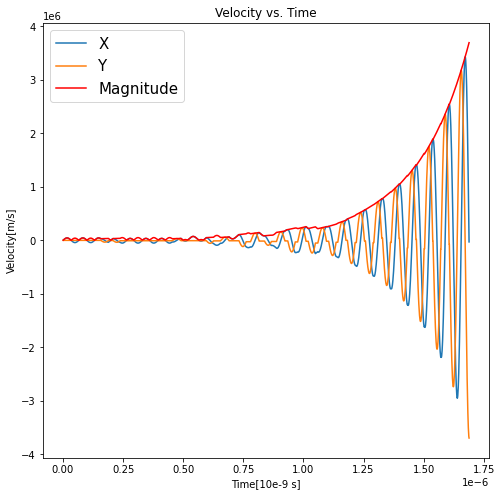

In [98]:
Vx = []
Vy = []
T = []
d_magnitude = []
while (np.linalg.norm(particlepos) < r_cyclotron): #loop while the magnitude of the proton's position 
    #remains within the cyclotron radius
    
    Fnet = np.array([0.0,0.0,0.0]) #create a vector for the net force on the particle.
    
    if np.absolute(particlepos[0]) < d/2: #if the particle is between the two D's calculate the electric force
        Fnet[0] = q*E_0*np.cos(w*t)
    else: #if the particle is not, calculate the magnetic force
        Fnet = q*np.cross(particlev,B)

    particlev = particlev + Fnet*dt/m #Update the velocity of the particle
    particlepos = particlepos + particlev*dt #Use velocity to update the position of the particle
    particleposx = np.append(particleposx, particlepos[0]) #append the x position to the x-position list
    particleposy = np.append(particleposy, particlepos[1]) #append the y position to the y-position list
    t = t + dt #update the timestep
    Vx = np.append(Vx,particlev[0])
    Vy = np.append(Vy,particlev[1])
    T = np.append(T, t)
    d_magnitude = np.append(d_magnitude, np.sqrt((particlepos[0]**2)+ (particlepos[1]**2)))
    
print("Cyclotron Frequency is", w, "rad/s (or ", f, " Hz,", round(f/1e6), "MHz)")
print("The final speed of the particle is", np.linalg.norm(particlev), "m/s, ", 
      round(np.linalg.norm(particlev/1000)), "km/s")
KE = kinetic(np.linalg.norm(particlev), m)
print("Kinetic Energy is", KE, "J (", J_to_eV(KE) ,"eV,", round( J_to_eV(KE)/1000),"KeV)")
print("Distance Traveled is",sum(d_magnitude), "m")

tot = np.sqrt((Vx**2) + (Vy**2))
# Change in Velocity plot
plt.figure(figsize=(8,8))
plt.plot(T, Vx, label="X")
plt.plot(T, Vy, label="Y")
plt.plot(T, tot, "r", label="Magnitude")
plt.title("Velocity vs. Time")
plt.xlabel("Time[10e-9 s]")
plt.ylabel("Velocity[m/s]")
plt.legend(fontsize =15)

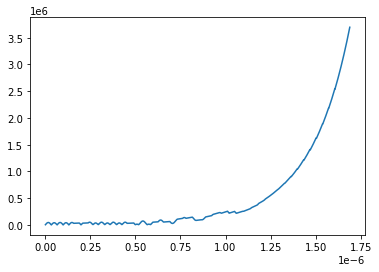

In [99]:
tot = np.sqrt((Vx**2)+ (Vy**2))
plt.plot(T, tot)

In [100]:
m_to_in(0.16)

6.2992

# Trajectory Plot 

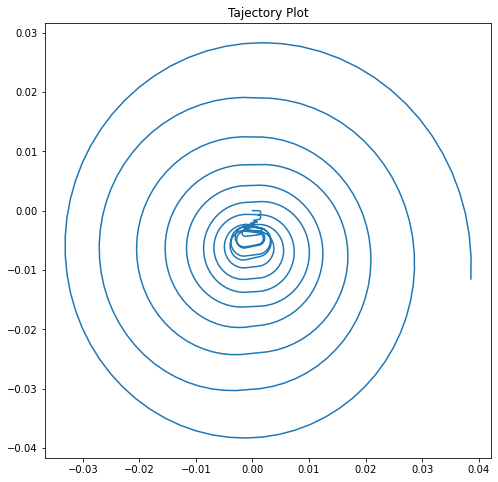

('ß = 1.0T', 'V = 100volts', 'd = 0.002286m', 'r = 0.04m')


In [101]:
txt = ("ß = " + str(B[2]) + "T",
       "V = " + str(V) + "volts",
       "d = " + str(round(d,6)) + "m",
       "r = " + str(r_cyclotron) + "m"
      )
plt.figure(1, figsize=(8,8)) #create the figure
plt.plot(particleposx, particleposy) #create the plot
plt.title("Tajectory Plot")
#plt.savefig("Test2_ß2-7_V50_d1.25_r8cm_2.jpeg")
plt.show()
print(txt)


In [72]:
check_structure()

--->w doesn't match
258682634.7305389  rad/s vs. 258682634.73053896 rad/s
Pd:  2.304161036456073e-14 %
--->V doesn't match
17797991.039033566 m/s vs. 28455089.820359282 m/s
Pd:  59.8780994886061 %
--->KE doesn't match
1651019.5177469577 eV vs. 4220172.094850301 eV
Pd:  155.6100669608863 %
--->t doesn't match
0.000339885000000306 s vs. 1.2144582711793875e-08 s
Pd:  99.99642685534468 %


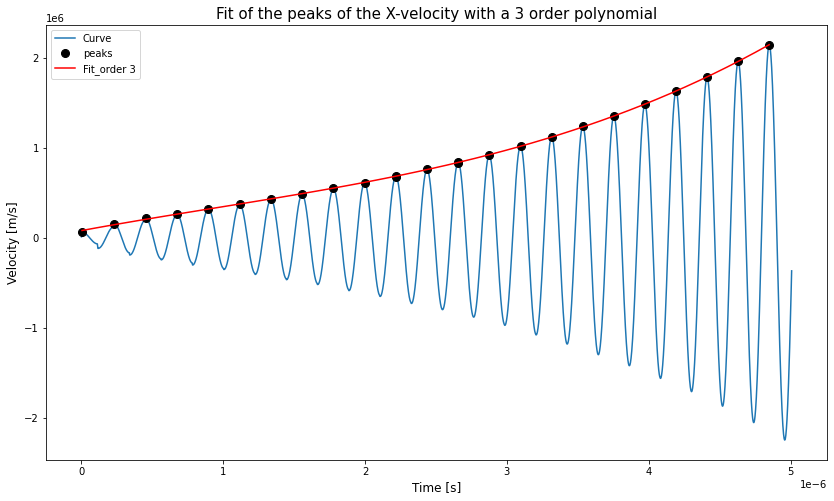

Acceleration X =
           3             2
1.373e+22 x - 3.875e+16 x + 2.912e+11 x + 8.153e+04


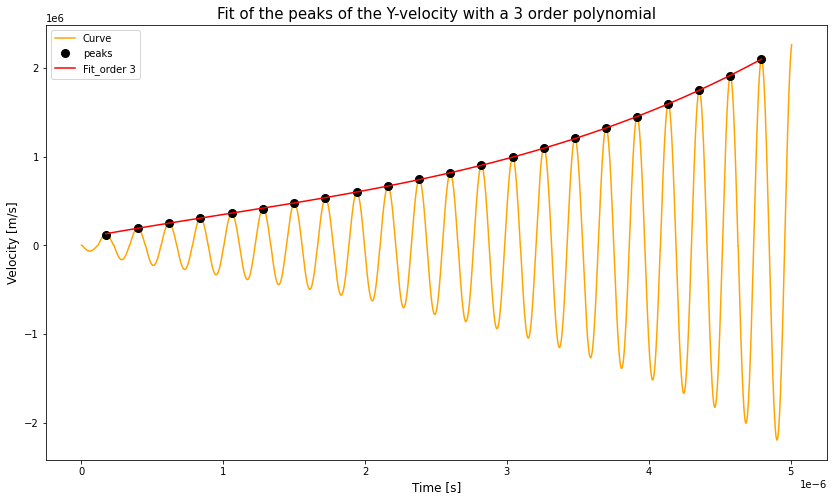

Acceleration Y = 
           3             2
1.327e+22 x - 3.589e+16 x + 2.88e+11 x + 7.823e+04


In [8]:
peaks_x, _ = find_peaks(Vx, height=0)

# calculate polynomial
z = np.polyfit(T[peaks_x],Vx[peaks_x], 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace((T[peaks_x])[0], (T[peaks_x])[-1], 50)
y_new = f(x_new)

plt.figure(figsize=(14,8))
plt.title("Fit of the peaks of the X-velocity with a 3 order polynomial", size=15)
plt.xlabel("Time [s]", size=12)
plt.ylabel("Velocity [m/s]", size=12)
plt.plot(T, Vx, 'tab:blue',label = 'Curve')
plt.plot(T[peaks_x],Vx[peaks_x],'ko', markersize = 8,  label = 'peaks')
plt.plot( x_new, y_new, 'r',label ='Fit_order 3')
plt.legend(fontsize=10)
plt.show()
print("Acceleration X =")
print(f)

peaks_y, _ = find_peaks(Vy, height=0)

# calculate polynomial
zy = np.polyfit(T[peaks_y],Vy[peaks_y], 3)
fy = np.poly1d(zy)

# calculate new x's and y's
x_newy = np.linspace((T[peaks_y])[0], (T[peaks_y])[-1], 50)
y_newy = fy(x_newy)

plt.figure(figsize=(14,8))
plt.title("Fit of the peaks of the Y-velocity with a 3 order polynomial", size=15)
plt.xlabel("Time [s]", size=12)
plt.ylabel("Velocity [m/s]", size=12)
plt.plot(T, Vy, 'orange', label = 'Curve')
plt.plot(T[peaks_y],Vy[peaks_y],'ko', markersize = 8,  label = 'peaks')
plt.plot( x_newy, y_newy, 'r',label ='Fit_order 3')
plt.legend(fontsize=10)
plt.show()
print("Acceleration Y = ")
print(fy)
    